R 🪨 Rocas = obstáculo o terreno costoso.

A 🏜️ Arena fina = coste alto de movimiento (más energía).

ZR ⛰️ Zona rocosa = no transitable.
ZA   Zanjas =no transitable
C 📡 Zona de comunicación = debe volver aquí a enviar datos.

PI 🧪 Puntos de interés = debe visitar para recolectar muestras.

Rover = Rover autonomo

| Símbolo     | Tipo de terreno         | Coste de movimiento | Descripción                             |
| -------     | ----------------------- | ------------------- | --------------------------------------- |
| `.`         | Plano                   | 1                   | Camino normal                           |
| `*`         | Rocas                   | 5                   | Más lento, gasta más energía            |
| `A`         | Arena fina              | 2                   | Más lento, gasta más energía            |
| `D`         | Duna                    | 3                   | Aún más costoso                         |
| `O`         | Obstáculo               | —                   | No transitable                          |
| `R`         | Rover (posición actual) | —                   | Rover                                   |
| `B`         | Base de comunicación    | —                   | Punto donde puede transmitir y recargar |
| `I`         | Punto de interés        | —                   | Donde puede usar el brazo robótico      |


### Busqueda

Podemos emplear varias busquedas como BFS y Dijkstra, con el objetivo de calcular el camino o el costo que me lleve llegar a los objetivos si el rover debe de tomar la decision de buscar un objetivo u otro. En el caso de las heuristicas podemos usar algunas como Distancia Manhattan y Distancia Euclidiana, para estimar cual seria el costo de un camino

### Planificación

 En el caso de planificación la podemos usar para saber que secuencia de pasos debemos de seguir. La parte de planificación es el "cerebro" de la operación, el que decide la estrategia general.

### CSP

Variables: representan aspectos del problema (energía, tiempo, posición, memoria, etc.)

Dominios: valores posibles para cada variable

Restricciones: relaciones que deben cumplirse entre las variables

El objetivo del CSP es asignar valores a todas las variables de forma que se cumplan todas las restricciones.

### Metaheurísticas

Base = punto inicial

PIs 

Costos entre puntos (energía o distancia) obtenidos con tu módulo de búsqueda (Dijkstra).

Beneficio (valor científico) de cada PI.

      +-------------------------------------------+
      |                METAHEURÍSTICA             |
      |   (optimiza orden, umbrales, parámetros)  |
      +-------------------------------------------+
                           ↓
      +-------------------------------------------+
      |                PLANIFICADOR               |
      |   (genera plan de alto nivel:             |
      |    mover, recolectar, recargar, etc.)     |
      +-------------------------------------------+
                           ↓
      +-------------------------------------------+
      |             MÓDULO DE BÚSQUEDA             |
      |   (encuentra rutas óptimas en el mapa)     |
      +-------------------------------------------+
                           ↓
      +-------------------------------------------+
      |                     CSP                   |
      | (valida restricciones de energía, tiempo, |
      |   comunicación, memoria, etc.)             |
      +-------------------------------------------+


### Duda, el rover debe de tener limitaciones de espacio en memoria
### Que seria analizar

In [4]:
import time 

import random


In [5]:
class Rover:
    def __init__(self, x, y, energia_max):
        self.x = x
        self.y = y
        self.energia = energia_max
        self.energia_max = energia_max
        self.muestras = 0
        self.comunicacion = True  # Solo True cuando está en base
        self.brazo_activo = False

    def mover(self, dx, dy, coste):
        if self.energia >= coste:
            self.x += dx
            self.y += dy
            self.energia -= coste
        else:
            print("Energía insuficiente para moverse.")

    def recargar(self):
        if self.energia<=self.energia_max:
            time.sleep(2)
        else:
            time.sleep(1)
        self.energia = self.energia_max
        print("Rover recargado en la base.")

    def recolectar(self):
        if self.brazo_activo and self.energia >= 2:
            self.muestras += 1
            self.energia -= 2
            print("Mineral recolectado.")
        else:
            print("Activa el brazo robótico o recarga energía.")

    def activar_brazo(self):
        self.brazo_activo = True
        print("Brazo robótico activado.")


In [ ]:
class ContextoMarciano:
    def __init__(self, tamaño=15, energia_max=100,rover=[0,0],base=(0,0)):
        self.tamaño = tamaño
        self.mapa = self.generar_mapa()
        self.rover = Rover(rover[0], rover[1], energia_max)
        self.base = base
        self.puntos_interes = random.sample([(x, y) for x in range(tamaño) for y in range(tamaño) if (x, y) != base], 3)
        
    def generar_mapa(self):
        terrenos = ['.',"*", 'A', 'D', 'O']
        pesos = [0.5,0.3 ,0.25, 0.15, 0.1]
        return [[random.choices(terrenos, pesos)[0] for _ in range(15)] for _ in range(15)]

    def mostrar_mapa(self):
        for i in range(self.tamaño):
            fila = ""
            for j in range(self.tamaño):
                if (i, j) == (self.rover.x, self.rover.y):
                    fila += "R "
                elif (i, j) == self.base:
                    fila += "B "
                elif (i, j) in self.puntos_interes:
                    fila += "I "
                else:
                    fila += self.mapa[i][j] + " "
            print(fila)
        print(f"Energía: {self.rover.energia} | Muestras: {self.rover.muestras}")
    def tipo_terreno(self, x, y):
        if 0 <= x < self.tamaño and 0 <= y < self.tamaño:
            return self.mapa[x][y]
        return 'O'

    def coste_movimiento(self, terreno):
        if terreno == '.': return 1
        if terreno == 'A': return 2
        if terreno == 'D': return 3
        if terreno == '*': return 5

        return 999  # obstáculo o inválido

    def celda_valida(self, x, y):
        if 0 <= x < self.tamaño and 0 <= y < self.tamaño:
            return self.mapa[x][y] != 'O'
        return False
    def mover_aleatorio(self):
        # Posibles direcciones: arriba, abajo, izquierda, derecha
        direcciones = [(-1,0), (1,0), (0,-1), (0,1)]
        random.shuffle(direcciones)  # Para variar el orden

        for dx, dy in direcciones:
            nx, ny = self.rover.x + dx, self.rover.y + dy
            if self.celda_valida(nx, ny):
                terreno = self.tipo_terreno(nx, ny)
                coste = self.coste_movimiento(terreno)
                self.rover.mover(dx, dy, coste)
                return True  # movimiento exitoso
        return False  # no pudo moverse (bloqueado)
    def simular(self,tipo_busqueda="dijkstra", pasos_max=100):
        print(f"\n🔴 Iniciando simulación con {tipo_busqueda.upper()}...\n")
        self.rover.activar_brazo()

        while self.puntos_interes and self.rover.energia > 0:
            self.mostrar_mapa()
            objetivo = self.puntos_interes[0]

            inicio_tiempo = time.time()
            ruta = buscar_ruta(self, (self.rover.x, self.rover.y), objetivo, tipo=tipo_busqueda)
            fin_tiempo = time.time()

            if not ruta:
                print("🚧 No se encontró ruta al objetivo.")
                break

            print(f"➡️ Ruta hacia {objetivo} encontrada ({len(ruta)} pasos, tiempo {fin_tiempo - inicio_tiempo:.4f}s)")

            # Mover paso a paso según la ruta
            for paso in ruta:
                if self.rover.energia <= 0:
                    print("⚡ Energía agotada durante la ruta.")
                    return
                terreno = self.tipo_terreno(paso[0], paso[1])
                coste = self.coste_movimiento(terreno)
                self.rover.mover(paso[0]-self.rover.x, paso[1]-self.rover.y, coste)
                self.mostrar_mapa()

            # Recolectar muestra
            if (self.rover.x, self.rover.y) == objetivo:
                self.rover.recolectar()
                self.puntos_interes.remove(objetivo)
                print(f"🧪 Muestra recolectada en {objetivo}.")

            # Volver a la base si no queda energía suficiente
            if self.rover.energia < 20 and self.base != (self.rover.x, self.rover.y):
                print("🔋 Energía baja, regresando a base...")
                ruta_base = buscar_ruta(self, (self.rover.x, self.rover.y), self.base, tipo=tipo_busqueda)
                for paso in ruta_base:
                    terreno = self.tipo_terreno(paso[0], paso[1])
                    coste = self.coste_movimiento(terreno)
                    self.rover.mover(paso[0]-self.rover.x, paso[1]-self.rover.y, coste)
                self.rover.recargar()
                print("🔋 Recarga completada en base.")

        if not self.puntos_interes:
            print("✅ Misión completa: todas las muestras recolectadas.")
        else:
            print("🔚 Simulación finalizada sin completar misión.")



In [61]:
entorno = ContextoMarciano()
entorno.simular(pasos_max=5)


🔴 Iniciando simulación con A_STAR...

Brazo robótico activado.
R A A . D . . D . . . . * * D 
. . A . . * * A . I A D O . . 
. . A . O * D A . O D D . A . 
* D * A * A I A O A * O . . * 
* . . . . D . D O * * D A . . 
. . . . . A . A A O . . . . D 
* * A . . . * . A . . A . . . 
A A D * . . * * . D A O D D * 
* * . D A . * O * . . * . . I 
* * A . . A A . A * O D . . . 
. A D . . A * A A . A A O O A 
* . O O . . . * A . * . . * . 
. A * * . . A A . . * . D . . 
. . . . . . * O . A . A D A O 
* O A * A * . . D . A * A A . 
Energía: 100 | Muestras: 0
➡️ Ruta hacia (8, 14) encontrada (22 pasos, tiempo 0.0007s)
B R A . D . . D . . . . * * D 
. . A . . * * A . I A D O . . 
. . A . O * D A . O D D . A . 
* D * A * A I A O A * O . . * 
* . . . . D . D O * * D A . . 
. . . . . A . A A O . . . . D 
* * A . . . * . A . . A . . . 
A A D * . . * * . D A O D D * 
* * . D A . * O * . . * . . I 
* * A . . A A . A * O D . . . 
. A D . . A * A A . A A O O A 
* . O O . . . * A . * . . * . 
. A * * . . 

## Evaluación de Algoritmos de búsqueda 

In [ ]:
import heapq
import math

def heuristica(a, b,tipo="euclidiana"):
    if tipo == "manhattan":
        return abs(a[0] - b[0]) + abs(a[1] - b[1])
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def buscar_ruta(contexto, inicio, objetivo, tipo="dijkstra",tipo_heuristica="manhattan"):
    open_set = []
    heapq.heappush(open_set, (0, inicio))
    came_from = {}
    g_score = {inicio: 0}
    
    while open_set:
        costo, actual = heapq.heappop(open_set)

        if actual == objetivo:
            ruta = []
            while actual in came_from:
                ruta.append(actual)
                actual = came_from[actual]
            ruta.reverse()
            return ruta
        
        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            nx, ny = actual[0]+dx, actual[1]+dy
            if not contexto.celda_valida(nx, ny):
                continue
            
            terreno = contexto.tipo_terreno(nx, ny)
            coste = contexto.coste_movimiento(terreno)
            tentative_g = costo + coste

            if (nx, ny) not in g_score or tentative_g < g_score[(nx, ny)]:
                g_score[(nx, ny)] = tentative_g
                if tipo == "a_star":
                    f = tentative_g + heuristica((nx, ny), objetivo,tipo_heuristica)
                elif tipo == "dijkstra":
                    f = tentative_g+ heuristica((nx, ny), objetivo,tipo_heuristica)
                heapq.heappush(open_set, (f, (nx, ny)))
                came_from[(nx, ny)] = actual

    return None  



In [53]:
import statistics

algoritmos = ["dijkstra", "a_star"]
heuristicas = ["euclidiana", "manhattan"]  # heurísticas a probar solo en A* y Dijkstra
repeticiones = 10
resultados=[]

for t in algoritmos:
    
    for h in heuristicas:
        pasos_list = []
        costo_list = []
        tiempo_list = []

        for _ in range(repeticiones):
            contexto = ContextoMarciano()
            inicio = (contexto.rover.x, contexto.rover.y)
            objetivo = contexto.puntos_interes[0]
            inicio_tiempo = time.time()

            ruta= buscar_ruta(contexto, inicio, objetivo, tipo=t, tipo_heuristica=h)
            tiempo = time.time() - inicio_tiempo

            if ruta:
                pasos_list.append(len(ruta))
                costo_list.append(sum(contexto.coste_movimiento(contexto.tipo_terreno(x, y)) for x, y in ruta))
                tiempo_list.append(tiempo)
        resultados.append({
            "algoritmo": t,
            "heuristica": h,
            "pasos_list": pasos_list,
            "costo_list": costo_list,
            "tiempo_list": tiempo_list,
            "promedio_pasos": statistics.mean(pasos_list) if pasos_list else None,
            "promedio_costo": statistics.mean(costo_list) if costo_list else None,
            "promedio_tiempo": statistics.mean(tiempo_list) if tiempo_list else None,
            "min_pasos": min(pasos_list) if pasos_list else None,
            "max_pasos": max(pasos_list) if pasos_list else None,
            "min_costo": min(costo_list) if costo_list else None,
            "max_costo": max(costo_list) if costo_list else None,
            "min_tiempo": min(tiempo_list) if tiempo_list else None,
            "max_tiempo": max(tiempo_list) if tiempo_list else None,
            "stdev_pasos": statistics.stdev(pasos_list) if pasos_list else None,
            "stdev_costo": statistics.stdev(costo_list) if costo_list else None,
            "stdev_tiempo": statistics.stdev(tiempo_list) if tiempo_list else None,
            "repeticiones_validas": len(pasos_list)
        })
        print(f"\nAlgoritmo: {t.upper()} | Heurística: {h}")
        
        if pasos_list:  # Para evitar error si ruta nunca se encontró
            print(f"Mínimo de pasos: {min(pasos_list):.2f}, máximo  {max(pasos_list):.4f}")
            print(f"Promedio costo: {min(costo_list):.2f},máximo  {max(costo_list):.4f}")
            print(f"Promedio tiempo: {min(tiempo_list):.4f}, máximo  {max(tiempo_list):.4f} s")
            print(f"Promedio pasos: {statistics.mean(pasos_list):.2f}")
            print(f"Promedio costo: {statistics.mean(costo_list):.2f}")
            print(f"Promedio tiempo: {statistics.mean(tiempo_list):.4f} s")
            print(f"Desviación promedio de pasos: {statistics.stdev(pasos_list):.2f}")
            print(f"Desviación promedio de costo: {statistics.stdev(costo_list):.2f}")
            print(f"Desviación promedio de tiempo: {statistics.stdev(tiempo_list):.4f} s")

        else:
            print("No se encontraron rutas válidas en ninguna ejecución.")



Algoritmo: DIJKSTRA | Heurística: euclidiana
Mínimo de pasos: 5.00, máximo  22.0000
Promedio costo: 12.00,máximo  29.0000
Promedio tiempo: 0.0001, máximo  0.0005 s
Promedio pasos: 13.30
Promedio costo: 22.80
Promedio tiempo: 0.0003 s
Desviación promedio de pasos: 6.18
Desviación promedio de costo: 5.39
Desviación promedio de tiempo: 0.0002 s

Algoritmo: DIJKSTRA | Heurística: manhattan
Mínimo de pasos: 9.00, máximo  17.0000
Promedio costo: 11.00,máximo  26.0000
Promedio tiempo: 0.0001, máximo  0.0004 s
Promedio pasos: 13.71
Promedio costo: 20.86
Promedio tiempo: 0.0002 s
Desviación promedio de pasos: 3.50
Desviación promedio de costo: 5.11
Desviación promedio de tiempo: 0.0001 s

Algoritmo: A_STAR | Heurística: euclidiana
Mínimo de pasos: 3.00, máximo  19.0000
Promedio costo: 3.00,máximo  36.0000
Promedio tiempo: 0.0000, máximo  0.0004 s
Promedio pasos: 11.90
Promedio costo: 23.50
Promedio tiempo: 0.0002 s
Desviación promedio de pasos: 5.69
Desviación promedio de costo: 10.29
Desviaci

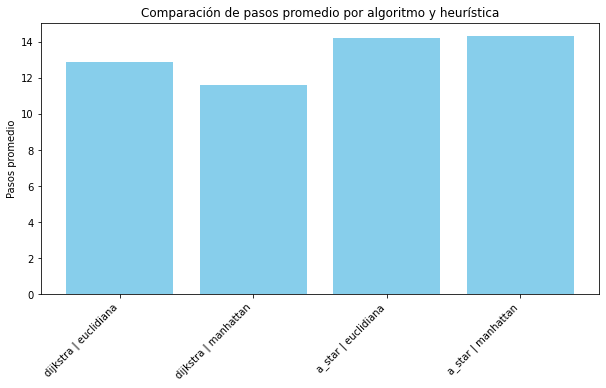

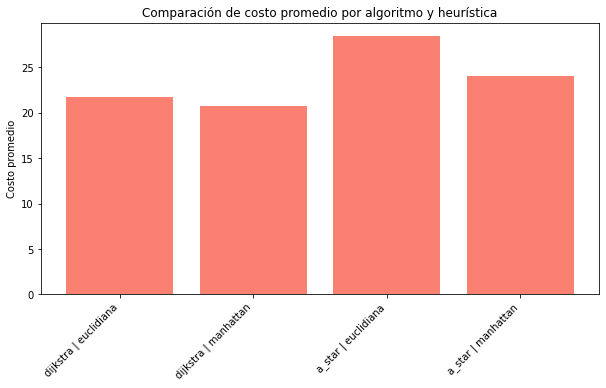

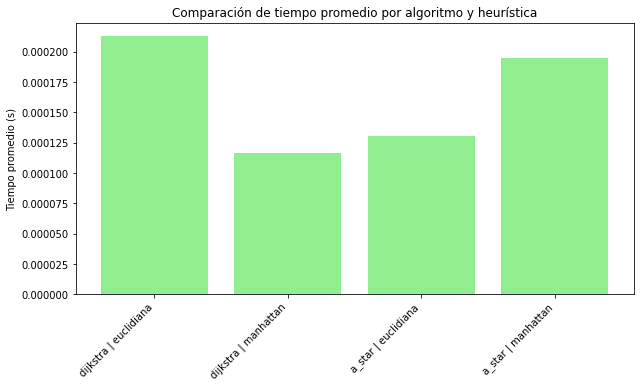

In [47]:
import matplotlib.pyplot as plt

# Extraer datos
alg_heu = [f"{r['algoritmo']} | {r['heuristica']}" for r in resultados]
prom_pasos = [r['promedio_pasos'] for r in resultados]
prom_costo = [r['promedio_costo'] for r in resultados]
prom_tiempo = [r['promedio_tiempo'] for r in resultados]

# Gráfico de pasos promedio
plt.figure(figsize=(10,5))
plt.bar(alg_heu, prom_pasos, color='skyblue')
plt.ylabel('Pasos promedio')
plt.xticks(rotation=45, ha='right')
plt.title('Comparación de pasos promedio por algoritmo y heurística')
plt.show()

# Gráfico de costo promedio
plt.figure(figsize=(10,5))
plt.bar(alg_heu, prom_costo, color='salmon')
plt.ylabel('Costo promedio')
plt.xticks(rotation=45, ha='right')
plt.title('Comparación de costo promedio por algoritmo y heurística')
plt.show()

# Gráfico de tiempo promedio
plt.figure(figsize=(10,5))
plt.bar(alg_heu, prom_tiempo, color='lightgreen')
plt.ylabel('Tiempo promedio (s)')
plt.xticks(rotation=45, ha='right')
plt.title('Comparación de tiempo promedio por algoritmo y heurística')
plt.show()


/tmp/ipykernel_7751/4063843951.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(pasos_todos, labels=labels)


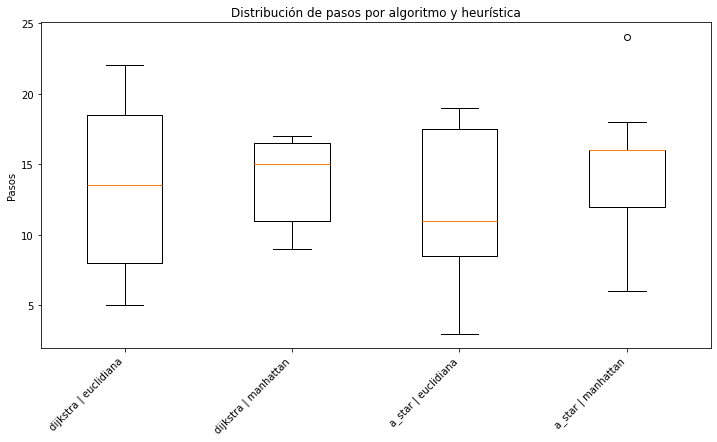

In [55]:
pasos_todos = [r['pasos_list'] for r in resultados]
costo_todos = [r['costo_list'] for r in resultados]
tiempo_todos = [r['tiempo_list'] for r in resultados]

labels = [f"{r['algoritmo']} | {r['heuristica']}" for r in resultados]

plt.figure(figsize=(12,6))
plt.boxplot(pasos_todos, labels=labels)
plt.ylabel('Pasos')
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de pasos por algoritmo y heurística')
plt.show()


#### El mejor algoritmo de los estudiados es dijkstra con la heurística manhattan

## Evaluación de Planificación

In [62]:
class Planificador:
    """
    Planificador simbólico simple que decide qué acciones ejecutar
    para cumplir los objetivos de la misión.
    """
    def __init__(self, contexto):
        self.ctx = contexto

    def generar_plan(self):
        plan = []
        rover = self.ctx.rover
        base = self.ctx.base

        # 1️⃣ Ir a cada punto de interés y recolectar
        for poi in self.ctx.puntos_interes:
            plan.append(("MOVER", poi))
            plan.append(("RECOLECTAR", poi))
        
        # 2️⃣ Regresar a la base y transmitir datos
        plan.append(("MOVER", base))
        plan.append(("TRANSMITIR", None))
        return plan
